In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the data
data=pd.read_table('B-41- WELLS - Copy.LAS', delim_whitespace=True, index_col='M__DEPTH')

#data=data.replace('-999.25', np.nan)

# Replace '-999.25' with NaN, ensuring that the values are treated as strings first
data = data.applymap(lambda x: np.nan if str(x).strip() == '-999.25' else x)

# Convert all columns to numeric (force conversion and replace any errors with NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Rename columns and set DEPT as the index
data=data.rename(columns={'M__DEPTH':'DEPT'})
data['DEPT']=data.index
# Print the data to verify
print(data.head())

C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\133095693.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_table('B-41- WELLS - Copy.LAS', delim_whitespace=True, index_col='M__DEPTH')
C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\133095693.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.nan if str(x).strip() == '-999.25' else x)


          CALI  DPHI  DT  GR  ILM  LL8     ILD  NPHI  RHOB  SP      DEPT
M__DEPTH                                                                
304.8000   NaN   NaN NaN NaN  NaN  NaN  0.8245   NaN   NaN NaN  304.8000
304.9524   NaN   NaN NaN NaN  NaN  NaN  0.8245   NaN   NaN NaN  304.9524
305.1048   NaN   NaN NaN NaN  NaN  NaN  0.8245   NaN   NaN NaN  305.1048
305.2572   NaN   NaN NaN NaN  NaN  NaN  0.8245   NaN   NaN NaN  305.2572
305.4096   NaN   NaN NaN NaN  NaN  NaN  0.8245   NaN   NaN NaN  305.4096


In [3]:
tops = ('Banquereau Fm','Wyandot Fm','Wyandot Shale','Dawson Canyon','Logan Canyon','U Missisauga Fm','O Limestone','L Missisauga Fm','Abenaki Fm')
tops_depths=(147.8, 858.62, 965.64, 1001.2, 1157.6, 2247.4, 2409.6, 3174.9, 3355)

In [8]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,12), sharey=True)
    fig.suptitle("B-14_Composite Log", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR, CALI, SP track
    
    ax01=ax[0].twiny()
    ax01.set_xlim(-80,20)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("SP [mV]")
    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
    ax01.set_xlabel('SP[mV]',color='blue')    
    ax01.tick_params(axis='x', colors='blue')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(6,36)
    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='black') 
    ax02.spines['top'].set_position(('outward',40))
    ax02.set_xlabel('CALI[in]',color='black')    
    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.ILD, logs.DEPT, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(logs.ILM, logs.DEPT, label='ILM[m.ohm]', color='purple') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('ILM[m.ohm]', color='purple')    
    ax12.tick_params(axis='x', colors='purple')
    
    ax13=ax[1].twiny()
    ax13.set_xlim(0.1,100)
    ax13.set_xscale('log')
    ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[m.ohm]', color='black') 
    ax13.spines['top'].set_position(('outward',0))
    ax13.set_xlabel('LL8[m.ohm]',color='black')
    ax13.tick_params(axis='x', colors='black')


#3rd track: DT, RHOB, NPHI track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(20,206)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-15,70)
    #ax22.invert_xaxis()
    ax22.plot(logs.NPHI, logs.DEPT, label='NPHI[%]', color='green') 
    ax22.spines['top'].set_position(('outward',35))
    ax22.set_xlabel('NPHI[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(-15,60)
    #ax23.invert_xaxis()
    ax23.plot(logs.DPHI, logs.DEPT, label='DPHI[%]', color='purple') 
    ax23.spines['top'].set_position(('outward',70))
    ax23.set_xlabel('DPHI[%]', color='purple')    
    ax23.tick_params(axis='x', colors='purple')

    ax24=ax[2].twiny()
    ax24.set_xlim(1.95,2.95)
    ax24.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red') 
    ax24.spines['top'].set_position(('outward',100))
    ax24.set_xlabel('RHOB[g/cc]',color='red')
    ax24.tick_params(axis='x', colors='red')
    
    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')

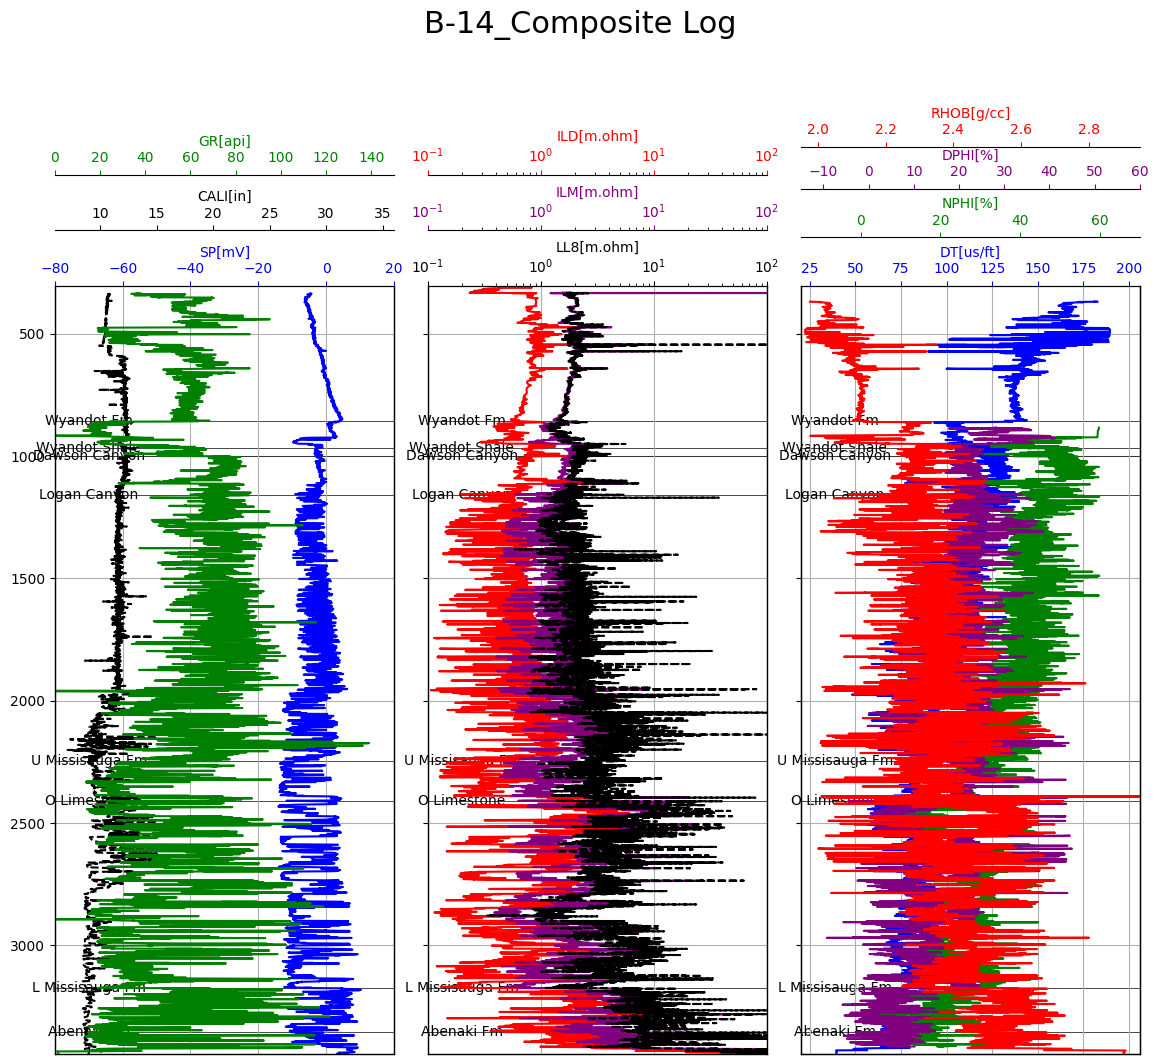

In [9]:
#%matplotlib nbagg

triple_combo_plot(data.DEPT.min(),data.DEPT.max())

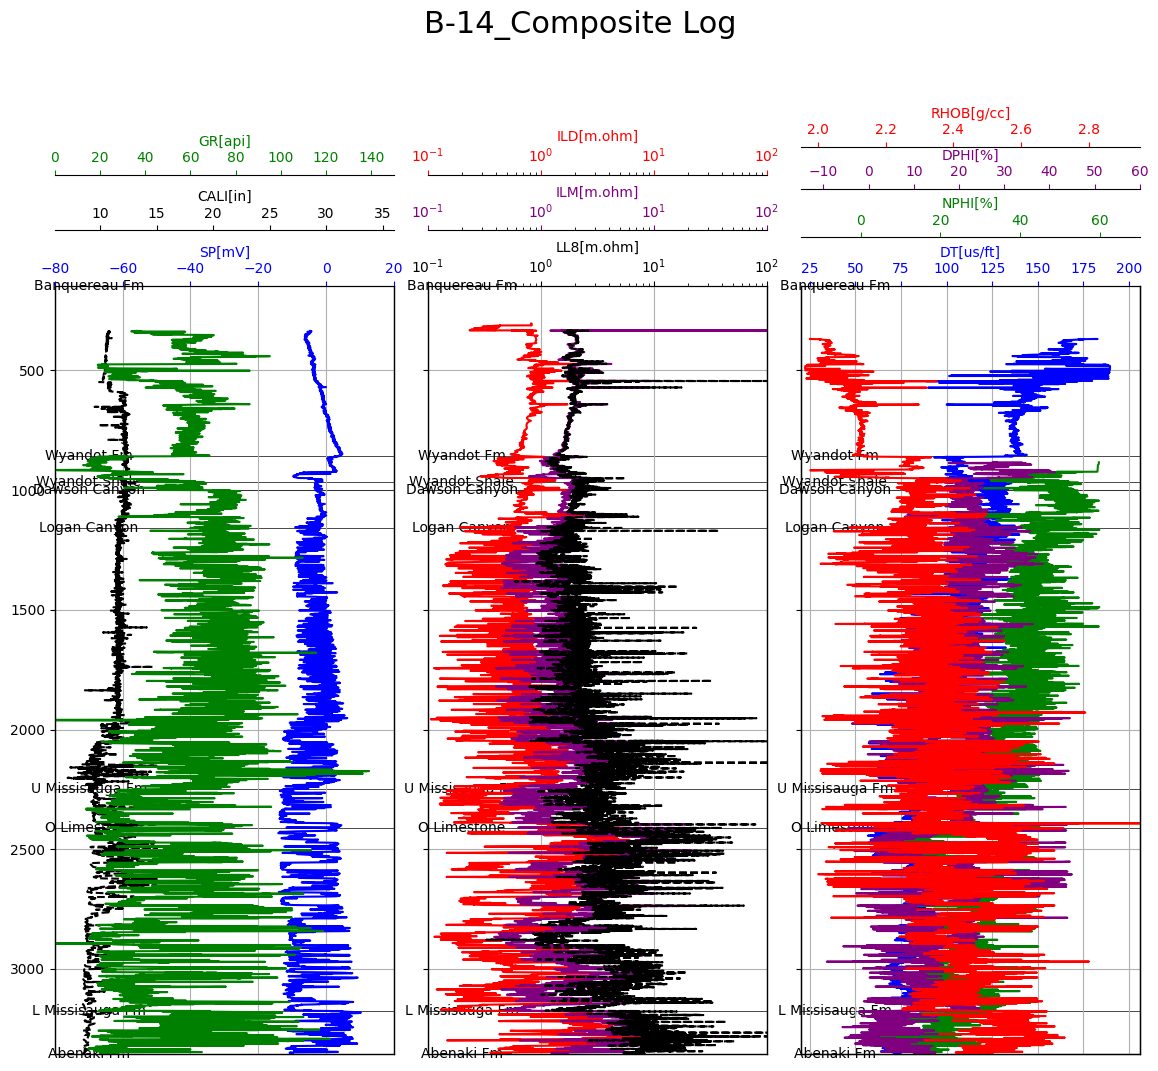

In [10]:
top_depth= 147.8
bottom_depth= 3355

triple_combo_plot(top_depth,bottom_depth)

In [16]:
#VCLGR
def vclgr(gr_log, gr_clean, gr_clay, correction=None):

    igr=(gr_log-gr_clean)/(gr_clay-gr_clean)       #Linear Gamma Ray
    vclgr_larionov_young=0.083*(2**(3.7*igr)-1)   #Larionov (1969) - Tertiary rocks
    vclgr_larionov_old=0.33*(2**(2*igr)-1)        #Larionov (1969) - Older rocks
    vclgr_clavier=1.7-(3.38-(igr+0.7)**2)**0.5    #Clavier (1971)
    vclgr_steiber=0.5*igr/(1.5-igr)               #Steiber (1969) - Tertiary rocks

    if correction == "young":
        vclgr=vclgr_larionov_young
    elif correction == "older":
        vclgr=vclgr_larionov_old
    elif correction=="clavier":
        vclgr=vclgr_clavier
    elif correction=="steiber":
        vclgr=vclgr_steiber
    else:
        vclgr=igr
    return vclgr

#VCLSP
def vclsp(sp_log, sp_clean, sp_clay):
    vclsp=(sp_log-sp_clean)/(sp_clay-sp_clean)
    return vclsp

#VCLRT
#def vclrt(rt_log, rt_clean,rt_clay):
    #vrt=(rt_clay/rt_log)*(rt_clean-rt_log)/(rt_clean-rt_clay)
    #if (rt_log > 2* rt_clay):
        #vclrt = 0.5 * (2 * vrt)** (0.67*(vrt+1)) 
    #else:
        #vclrt = vrt
    #return vclrt


#VCLGR
def vclgr(gr_log, gr_clean,gr_clay):
    vgr=(gr_clay/gr_log)*(gr_clean-gr_log)/(gr_clean-gr_clay)
    if (gr_log > 2* gr_clay):
        vclgr = 0.5 * (2 * vclgr)** (0.67*(vclgr+1)) 
    else:
        vclgr = vgr
    return vclgr

#VCLND
def vclnd(neut_log,den_log,neut_clean1,den_clean1,neut_clean2,den_clean2,neut_clay,den_clay):
    term1 = (den_clean2-den_clean1)*(neut_log-neut_clean1)-(den_log-den_clean1)*(neut_clean2-neut_clean1)
    term2 =(den_clean2-den_clean1)*(neut_clay-neut_clean1)-(den_clay-den_clean1)*(neut_clean2-neut_clean1)
    vclnd=term1/term2
    return vclnd

In [17]:
# Input parameters 
logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]


gr_clean, gr_clay = 30, 135
sp_clean, sp_clay = -50,2

neut_clean1, den_clean1 = 30, 2.5
neut_clean2, den_clean2 = 45, 2
neut_clay, den_clay =50, 2.9

#calculate the VCL functions, by looping with pandas series values through VCL functions defined above
# without looping - the function will throw an error
vclgr_temp,vclnd_temp, vclrt_temp, vclsp_temp =[],[],[],[]

for (i,j,k,l,m) in zip(logs.GR,logs.NPHI,logs.RHOB,logs.ILD,logs.SP):
    vclgr_temp.append(vclgr(i, gr_clean, gr_clay))
    vclnd_temp.append(vclnd(j,k,neut_clean1,den_clean1,neut_clean2,den_clean2,neut_clay,den_clay))
    vclsp_temp.append(vclsp(m, sp_clean, sp_clay))
    
logs.is_copy = False # without will throw an exception

logs['VCLGR']=vclgr_temp
logs['VCLND']=vclnd_temp
logs['VCLSP']=vclsp_temp
del vclgr_temp, vclnd_temp, vclsp_temp         #remove the arrays to free mem

C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\1857706501.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['VCLGR']=vclgr_temp
C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\1857706501.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['VCLND']=vclnd_temp
C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\1857706501.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\3279846460.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax5.plot(neut_clay,den_clay,'ro',color='black')


Text(0.5, 0, 'VCL [v.v]')

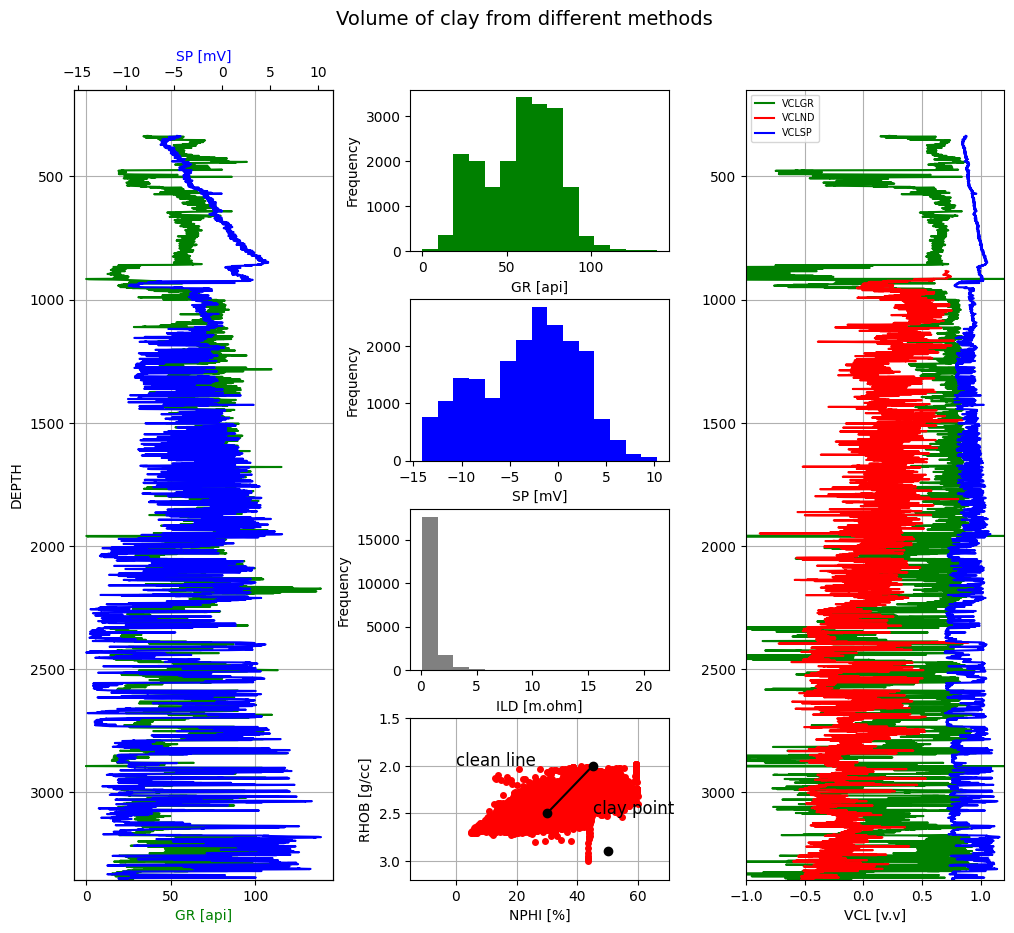

In [18]:

from matplotlib import gridspec

#logs=data.iloc[[top_depth],[bottom_depth]]
#logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
#print (logs.GR,logs.LLD)
#Setting GRAPH ELEMENTS

fig = plt.figure(figsize=(12,10))
fig.suptitle('Volume of clay from different methods',fontsize=14)
fig.subplots_adjust(top=0.90,wspace=0.3, hspace =0.3)

gs = gridspec.GridSpec(4, 3)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,1])
ax5 = fig.add_subplot(gs[3,1])
ax6 = fig.add_subplot(gs[:,2],sharey = ax1)

# Graph for GR,SP

ax1.invert_yaxis()
ax1.grid(True)
ax1.set_ylabel('DEPTH')
ax1.plot(logs.GR, logs.DEPT, color='green')
ax1.set_xlabel('GR [api]', color='green')

ax11=ax1.twiny()
#ax11.set_xlim(-80,20)
ax11.plot(logs.SP, logs.DEPT, color='blue')
ax11.set_xlabel("SP [mV]",color='blue')






#The graph of GR histogram
ax2.hist(logs.GR.dropna(),bins=15,color='green')
ax2.set_xlabel('GR [api]')
ax2.set_ylabel('Frequency')

ax3.hist(logs.SP.dropna(),bins=15, color='blue')
ax3.set_xlabel('SP [mV]')
ax3.set_ylabel('Frequency')

ax4.hist(logs.ILD.dropna(),bins=15, color='gray')
ax4.set_xlabel('ILD [m.ohm]')
ax4.set_ylabel('Frequency')


# N-D XPlot for Volume of Clay


ax5.plot(logs.NPHI, logs.RHOB,'ro',markersize=4)
ax5.set_xlabel('NPHI [%]')
ax5.set_xlim(-15,70)
ax5.set_ylim(3.2,1.5)
ax5.set_ylabel('RHOB [g/cc]')
ax5.grid(True)
ax5.text(0, 2, 'clean line', fontsize=12)
ax5.text(45, 2.5, 'clay point', fontsize=12)
ax5.plot([neut_clean1,neut_clean2],[den_clean1,den_clean2], marker='o', color='black')
ax5.plot(neut_clay,den_clay,'ro',color='black')



#plt.title("Volume of Clay")

ax6.plot(logs.VCLGR, logs.DEPT, label ='VCLGR',color="green")
ax6.plot(logs.VCLND, logs.DEPT,label ='VCLND',color="red")
ax6.plot(logs.VCLSP, logs.DEPT,label ='VCLSP',color="blue")
ax6.legend(loc='best',fontsize='x-small')
ax6.set_xlim(-1,1.2)
ax6.set_ylim(top_depth,bottom_depth)
ax6.invert_yaxis()
ax6.grid(True)
ax6.set_xlabel('VCL [v.v]')


#plt.savefig ('vcl_plot.png', dpi=200, format='png')

In [22]:
logs['VCL']=logs['VCLGR']

C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\2393321822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['VCL']=logs['VCLGR']


In [23]:
#Willie-TimeAverage
def phis_shale(dt_sh, dt_ma, dt_fl):
    phis_shale = (dt_sh-dt_ma)/(dt_fl-dt_ma)
    return phis_shale
def phis_w(dt_log, dt_ma, dt_fl, cp):
    phis_w=(1/cp)*(dt_log-dt_ma)/(dt_fl-dt_ma)
    return phis_w
def phis_w_sh_corr(dt_log, dt_ma, dt_fl, cp, dt_sh, vcl):
    phis_w=(1/cp)*(dt_log-dt_ma)/(dt_fl-dt_ma)
    phis_w_sh = (dt_sh-dt_ma)/(dt_fl-dt_ma)
    phis_w_sh_corr = phis_w - vcl * phis_w_sh
    return phis_w_sh_corr

#Raymer-Hunt-Gardner (the alpha(5/8) ranges from 0.625-0.70, 0.67-most, 0.60-gas reservoirs)
def phis_rhg(dt_log, dt_ma, alpha):
    phis_rhg=(alpha)*(dt_log-dt_ma)/(dt_log)
    return phis_rhg
def phis_rhg_sh_corr(dt_log, dt_ma, dt_sh, vcl):
    phis_rhg=(5/8)*(dt_log-dt_ma)/(dt_log)
    phis_rhg_sh = (dt_sh-dt_ma)/(dt_fl-dt_ma)
    phis_rhg_sh_corr = phis_rhg - vcl * phis_rhg_sh
    return phis_rhg_sh_corr

#Density
def phid(den_log, den_ma, den_fl, den_sh, vcl):
    phid = (den_log - den_ma) / (den_fl - den_ma)
    return phid
def phid_shale(den_sh, den_ma, den_fl):
    phid_shale = (den_sh - den_ma) / (den_fl - den_ma)
    return phid_shale
def phid_sh_corr(den, den_ma, den_fl, den_sh, vcl):
    phid = (den - den_ma) / (den_fl - den_ma)
    phid_sh = (den_sh - den_ma) / (den_fl - den_ma)
    phid_sh_corr = phid - vcl * phid_sh
    return phid_sh_corr

# NEUTRON:
def phin_sh_corr(neut, neut_sh, vcl):
    phin_sh_corr = (neut-vcl*neut_sh)/100
    return phin_sh_corr

#Neutron-Density
def phixnd(phinshc, phidshc):
    phixnd= (phinshc + phidshc) / 2
    return phixnd
def phixnd_gas_corr(phin, phid, phin_sh, phid_sh):
    phixnd_gas_corr= ((phin**2+phin**2)/2)**(0.5)    #for gas intervals (nphi<dphi = crossover)
    return phixnd_gas_corr

In [24]:
#Matrix, fluid and appropiate shales values must be declared in the next variables:
dt_ma, dt_fl, dt_sh, cp, alpha = 55.5,188.0,90.0,1,5/8
den_ma, den_fl, den_sh = 2.65, 1.1, 2.4

phis_sh=phis_shale(dt_sh, dt_ma, dt_fl)
phid_sh=phis_shale(den_sh, den_ma, den_fl)
phin_sh=45

#calculate the VCL functions, by looping with pandas series values through VCL functions defined above

logs['PHISw']=phis_w(logs.DT, dt_ma, dt_fl, cp)
logs['PHISwshc']=phis_w_sh_corr(logs.DT, dt_ma, dt_fl, cp, dt_sh, logs.VCL).clip(0,1)

logs['PHISrhg']=phis_rhg(logs.DT, dt_ma, alpha)
logs['PHISrhgshc']=phis_rhg_sh_corr(logs.DT, dt_ma, dt_sh, logs.VCL).clip(0,1)

logs['PHID']=phid(logs.RHOB, den_ma, den_fl, den_sh, logs.VCL)
logs['PHIDshc']=phid_sh_corr(logs.RHOB, den_ma, den_fl, den_sh, logs.VCL).clip(0,1)

logs['PHIN']=logs.NPHI/100
logs['PHINshc']=phin_sh_corr(logs.NPHI, phin_sh, logs.VCL).clip(0,1)

logs['PHIxND']=phixnd(logs.PHINshc,logs.PHIDshc).clip(0,1)

C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\2946416500.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['PHISw']=phis_w(logs.DT, dt_ma, dt_fl, cp)
C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\2946416500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['PHISwshc']=phis_w_sh_corr(logs.DT, dt_ma, dt_fl, cp, dt_sh, logs.VCL).clip(0,1)
C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\2946416500.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [25]:
logs['PHIE']=logs['PHIxND']

C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\1158116022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['PHIE']=logs['PHIxND']


In [26]:
a=1 #turtuosity factor
m=1.8 #cementation factor
n=2 #saturation exponent

C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\2010460760.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.loglog(logs.ILD[logs.VCL<vcl_limit],logs.PHIE[logs.VCL<vcl_limit],'ro', label='',color='red')


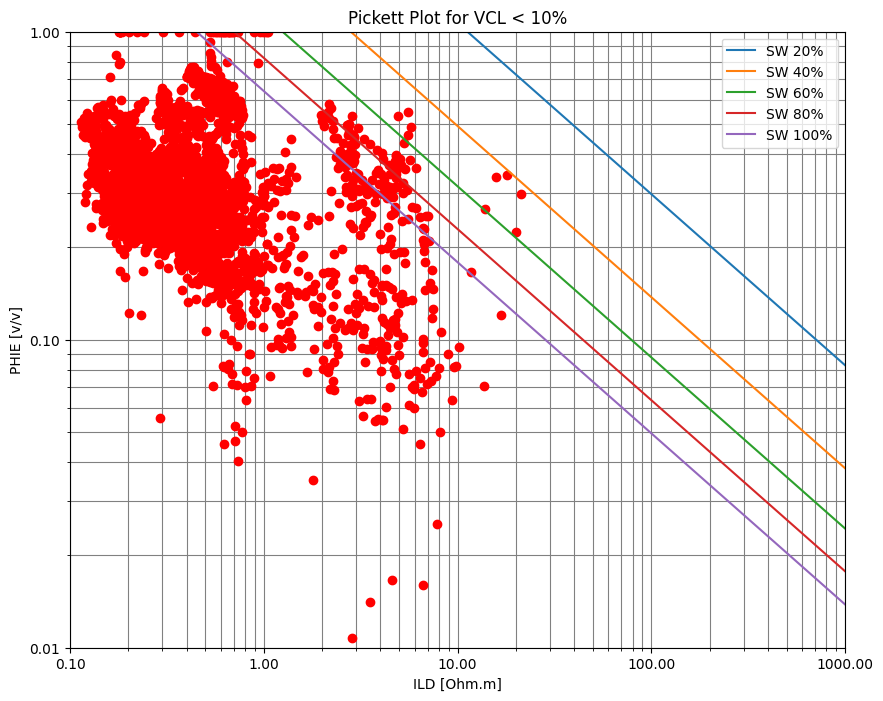

In [28]:
rwa=0.45       #water resistivity
vcl_limit=0.1 #volume of clay upper limit for selction of data for graph

import matplotlib.ticker as ticker

pickett_figure=plt.figure(figsize=(10,8))
plt.title('Pickett Plot'+ ' for VCL < '+str(int(vcl_limit*100))+'%')
plt.loglog(logs.ILD[logs.VCL<vcl_limit],logs.PHIE[logs.VCL<vcl_limit],'ro', label='',color='red')
plt.xlim(0.1,1000)
plt.ylim(0.01,1)
plt.ylabel('PHIE [v/v]')
plt.xlabel('ILD [Ohm.m]')
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))

#calculate the saturation lines
sw_plot=(0.2,0.4,0.6,0.8,1)
phie_plot=(0.01,1)
rt_plot=np.zeros((len(sw_plot),len(phie_plot)))
                
for i in range (0,len(sw_plot)):
    for j in range (0,len(phie_plot)):
        rt_result=((a*rwa)/(sw_plot[i]**n)/(phie_plot[j]**m))
        rt_plot[i,j]=rt_result      
for i in range(0,len(sw_plot)):
    plt.plot(rt_plot[i],phie_plot, label='SW '+str(int(sw_plot[i]*100))+'%')
    plt.legend (loc='best')
plt.grid(True, which='both',ls='-',color='gray')

#plt.savefig('pickett.png', dpi=200, format='png')

In [29]:
def sw_archie(Rw, Rt, Poro, a, m, n):
        F = a / (Poro**m)
        Sw_archie = (F * Rw/Rt)**(1/n)
        return Sw_archie

In [30]:
Rw =rwa
logs['SWa']=(sw_archie(Rw,logs.ILD,logs.PHIE,a,m,n)).clip(0,1)

C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\2367263678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['SWa']=(sw_archie(Rw,logs.ILD,logs.PHIE,a,m,n)).clip(0,1)


In [31]:
logs['BVW']=logs['SWa']*logs['PHIE']
logs['matrix']=1-logs.VCL-logs.PHIE

C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\2564797873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['BVW']=logs['SWa']*logs['PHIE']
C:\Users\Naveed\AppData\Local\Temp\ipykernel_3700\2564797873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs['matrix']=1-logs.VCL-logs.PHIE


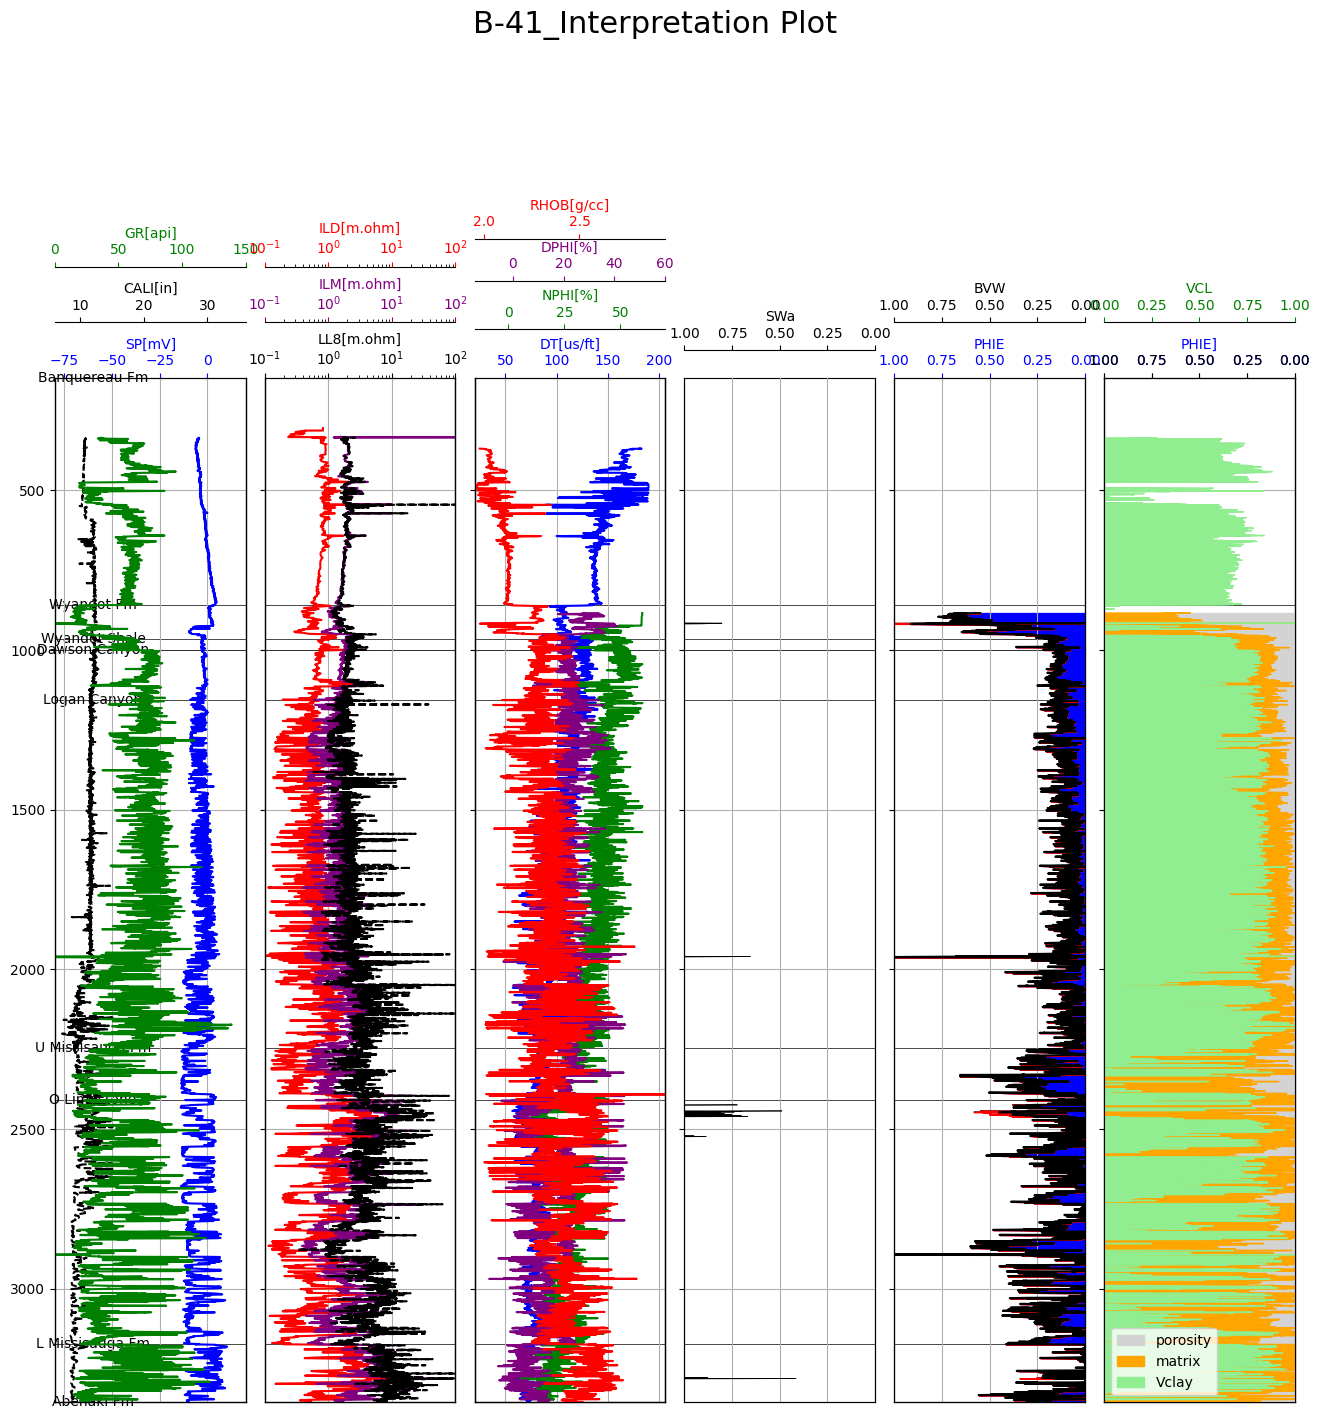

In [33]:
import matplotlib.pyplot as plt
# Create the figure and subplots

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(16,16), sharey=True)
fig.suptitle("B-41_Interpretation Plot", fontsize=22)
fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
for axes in ax:
    axes.set_ylim (top_depth,bottom_depth)
    axes.invert_yaxis()
    axes.yaxis.grid(True)
    axes.get_xaxis().set_visible(False)
    for i in tops_depths:
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
for (i,j) in zip(tops_depths,tops):
    if ((i>=top_depth) and (i<=bottom_depth)):
        ax[0].text(0.2, i ,j, horizontalalignment='center',verticalalignment='center')                
    
#1st track: GR, SP, CALI track
ax01=ax[0].twiny()
ax01.set_xlim(-80,20)
ax01.spines['top'].set_position(('outward',0))
ax01.set_xlabel("SP [mV]")
ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
ax01.set_xlabel('SP[mV]',color='blue')    
ax01.tick_params(axis='x', colors='blue')
ax01.grid(True)
    
ax02=ax[0].twiny()
ax02.set_xlim(6,36)
ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='black') 
ax02.spines['top'].set_position(('outward',40))
ax02.set_xlabel('CALI[in]',color='black')    
ax02.tick_params(axis='x', colors='black')
    
ax03=ax[0].twiny()
ax03.set_xlim(0,150)
ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
ax03.spines['top'].set_position(('outward',80))
ax03.set_xlabel('GR[api]',color='green')    
ax03.tick_params(axis='x', colors='green')
    

#2nd track: Resistivities
ax11=ax[1].twiny()
ax11.set_xlim(0.1,100)
ax11.set_xscale('log')
ax11.grid(True)
ax11.spines['top'].set_position(('outward',80))
ax11.set_xlabel('ILD[m.ohm]', color='red')
ax11.plot(logs.ILD, logs.DEPT, label='ILD[m.ohm]', color='red')
ax11.tick_params(axis='x', colors='red')    

ax12=ax[1].twiny()
ax12.set_xlim(0.1,100)
ax12.set_xscale('log')
ax12.plot(logs.ILM, logs.DEPT, label='ILM[m.ohm]', color='purple') 
ax12.spines['top'].set_position(('outward',40))
ax12.set_xlabel('ILM[m.ohm]', color='purple')    
ax12.tick_params(axis='x', colors='purple')
    
ax13=ax[1].twiny()
ax13.set_xlim(0.1,100)
ax13.set_xscale('log')
ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[m.ohm]', color='black') 
ax13.spines['top'].set_position(('outward',0))
ax13.set_xlabel('LL8[m.ohm]',color='black')
ax13.tick_params(axis='x', colors='black')

#3rd track: DT, RHOB, NPHI track
ax21=ax[2].twiny()
ax21.grid(True)
ax21.set_xlim(20,206)
ax21.spines['top'].set_position(('outward',0))
ax21.set_xlabel('DT[us/ft]')
ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue')
ax21.set_xlabel('DT[us/ft]', color='blue')    
ax21.tick_params(axis='x', colors='blue')
    
ax22=ax[2].twiny()
ax22.set_xlim(-15,70)
#ax22.invert_xaxis()
ax22.plot(logs.NPHI, logs.DEPT, label='NPHI[%]', color='green') 
ax22.spines['top'].set_position(('outward',35))
ax22.set_xlabel('NPHI[%]', color='green')    
ax22.tick_params(axis='x', colors='green')
    
ax23=ax[2].twiny()
ax23.set_xlim(-15,60)
#ax23.invert_xaxis()
ax23.plot(logs.DPHI, logs.DEPT, label='DPHI[%]', color='purple') 
ax23.spines['top'].set_position(('outward',70))
ax23.set_xlabel('DPHI[%]', color='purple')    
ax23.tick_params(axis='x', colors='purple')

ax24=ax[2].twiny()
ax24.set_xlim(1.95,2.95)
ax24.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red') 
ax24.spines['top'].set_position(('outward',100))
ax24.set_xlabel('RHOB[g/cc]',color='red')
ax24.tick_params(axis='x', colors='red')
 

#4th track: SW
ax31=ax[3].twiny()
ax31.grid(True)
ax31.set_xlim(1,0)
ax31.plot(logs.SWa, logs.DEPT, label='SWa', color='black', linewidth=0.5)
#ax31.plot(logs.SWs, logs.DEPT, label='SWa', color='green',linewidth=0.5)
ax31.spines['top'].set_position(('outward',20))
ax31.set_xlabel('SWa', color='black')    
ax31.tick_params(axis='x', colors='black')
    
#5th track: PHIE, BVW
ax41=ax[4].twiny()
ax41.grid(True)
ax41.set_xlim(1,0)
ax41.plot(logs.PHIE, logs.DEPT, label='PHIE', color='black', linewidth=0.5)
ax41.fill_betweenx(logs.DEPT,0,logs.BVW,color='blue')
ax41.spines['top'].set_position(('outward',0))
ax41.set_xlabel('PHIE', color='blue')    
ax41.tick_params(axis='x', colors='blue')

ax42=ax[4].twiny()
ax42.set_xlim(1,0)
ax42.plot(logs.BVW, logs.DEPT, label='BVW', color='black')
ax42.fill_betweenx(logs.DEPT,logs.PHIE, logs.BVW,color='red')
ax42.spines['top'].set_position(('outward',40))
ax42.set_xlabel('BVW', color='black')    
ax42.tick_params(axis='x', colors='black')

#6th track: PHIE, MATRIX, VCL

ax50=ax[5].twiny()
ax50.set_xlim(1,0)
ax50.spines['top'].set_position(('outward',0))
ax50.plot(logs.PHIE, logs.DEPT, label='PHIE', color='blue',linewidth=0.5)
ax50.set_xlabel('PHIE]', color='blue')    
ax50.tick_params(axis='x', colors='blue')

ax51=ax[5].twiny()
ax51.set_xlim(0,1)
ax51.spines['top'].set_position(('outward',40))
ax51.plot(logs.VCL, logs.DEPT, label='VCL', color='green',linewidth=0.5)
ax51.set_xlabel('VCL', color='green')    
ax51.tick_params(axis='x', colors='green')

ax52=ax[5].twiny()
ax52.set_xlim(1,0)
ax52.spines['top'].set_position(('outward',0))
ax52.fill_betweenx(logs.DEPT,0,logs.PHIE,color='lightgray',label='porosity')
ax52.fill_betweenx(logs.DEPT,logs.PHIE,1-logs.VCL,color='orange',label='matrix')
ax52.fill_betweenx(logs.DEPT,1-logs.VCL,1,color='lightgreen',label= 'Vclay')
ax52.legend(loc='lower left')

#plt.savefig ('interpretation_plot.png', dpi=200, format='png')

ZONE:  147.8 m - 3355 m
Mean values:
PHIE    0.135139
SWa     0.998543
BVW     0.134363
VCL     0.325051
dtype: float64


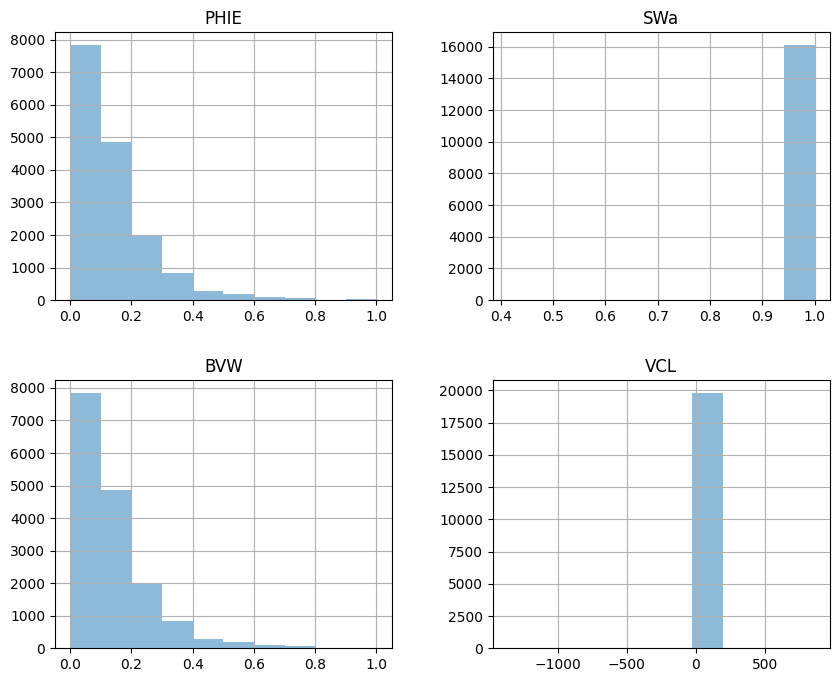

In [35]:

top_summary = 147.8
depth_summary = 3355
logs.loc[top_summary:depth_summary,['PHIE','SWa','BVW','VCL']].hist(figsize=(10, 8),alpha=0.5)
print ('ZONE: ', top_summary, 'm -', depth_summary, 'm')
print ('Mean values:')
print(logs.loc[top_summary:depth_summary,['PHIE','SWa','BVW','VCL']].mean())